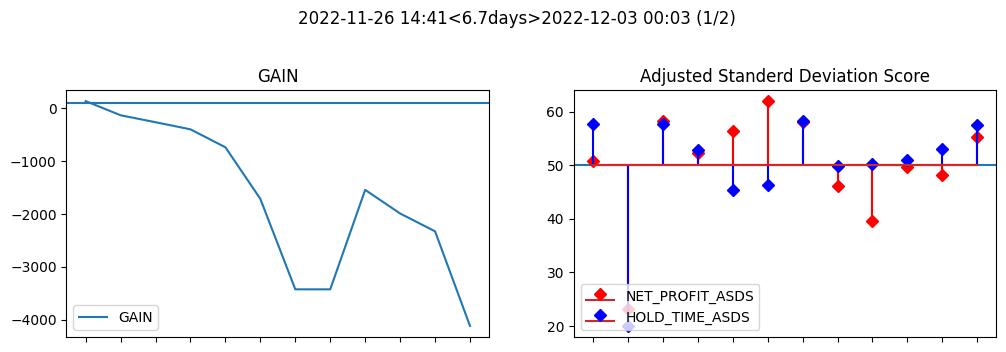

In [5]:
import ast
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def run(chunck_index):
    chunck_index -= 1
    df = pd.read_csv('/home/viceversa/Dropbox/bankof3v/testrun.csv')

    #-- INDEX --#    
    list_EXIT_TIME     = list(map(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M'), ast.literal_eval(df["EXIT_TIME"][chunck_index])))
    
    #-- GAIN_PROGRESS --#
    list_GAIN_PROGRESS = ast.literal_eval(df["GAIN_PROGRESS"][chunck_index])

    #-- HOLD_TIME --#
    list_HOLD_TIME     = list(map(lambda x: x*-1, ast.literal_eval(df["HOLD_MIN"][chunck_index])))
    HOLD_TIME_STV = np.std(list_HOLD_TIME)
    HOLD_TIME_AVE = np.mean(list_HOLD_TIME)
    list_HOLD_TIME_ASDS = [(round((list_HOLD_TIME[i]-HOLD_TIME_AVE)/HOLD_TIME_STV*10+50,1)) for i in range(len(list_HOLD_TIME))]

    #-- NET_PROFIT --#
    NET_PROFIT  = df["NET_PROFIT"][chunck_index]
    list_NET_PROFIT = ast.literal_eval(df["NET_PROFIT"][chunck_index])
    NET_PROFIT_STV = np.std(list_NET_PROFIT)
    NET_PROFIT_AVE = np.mean(list_NET_PROFIT)
    list_NET_PROFIT_ASDS = [(round((list_NET_PROFIT[i]-NET_PROFIT_AVE)/NET_PROFIT_STV*10+50,1)) for i in range(len(list_NET_PROFIT))]

    #-- DATA_INFO --#
    DAYS_CHUNK  = df["DAYS_CHUNK"][chunck_index]
    DAYS_TOTAL  = df["DAYS_TOTAL"][chunck_index]
    CHUNK_INDEX = df["CHUNK_INDEX"][chunck_index]
    TOTAL_CHUNK = df["TOTAL_CHUNK"][chunck_index]
    #_____________________________________________________

    fig = plt.figure(figsize=(12, 8))
    plt.suptitle(f'{list_EXIT_TIME[0]}<{DAYS_CHUNK}days>{list_EXIT_TIME[-1]} ({CHUNK_INDEX}/{TOTAL_CHUNK})')
    locator = mdates.AutoDateLocator(minticks=7, maxticks=15)
    total_charts = 2
    #_____________________________________________________

    ax1 = fig.add_subplot(total_charts, 2, 1)
    ax1.set_title(f'GAIN')
    ax1.axhline(y=100)
    ax1.plot(list_EXIT_TIME, list_GAIN_PROGRESS, label="GAIN")
    ax1.xaxis.set_major_locator(locator)
    ax1.legend(loc = 'lower left')
    #_____________________________________________________

    ax2 = fig.add_subplot(total_charts, 2, 2)
    ax2.set_title(f'Adjusted Standerd Deviation Score')
    ax2.axhline(y=50)
    ax2.stem(list_EXIT_TIME, list_NET_PROFIT_ASDS, label="NET_PROFIT_ASDS", bottom = 50, linefmt ='red', markerfmt ='D')
    ax2.stem(list_EXIT_TIME, list_HOLD_TIME_ASDS, label="HOLD_TIME_ASDS", bottom = 50, linefmt ='blue', markerfmt ='D')
    ax2.xaxis.set_major_locator(locator)
    ax2.legend(loc = 'lower left')
    #_____________________________________________________

    fig.autofmt_xdate()
    plt.show()

run(1)